In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv(r'cardio_train.csv', sep = "\;", engine = 'python')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Let's convert the data into long format and depict the value counts of the categorical features.

In [4]:
df2 = pd.melt(frame = df, value_vars = ['gender','cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'])
df2 = pd.DataFrame(df2.groupby(['variable', 'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
df2

,variable,value,count
0,active,0,13739
1,active,1,56261
2,alco,0,66236
3,alco,1,3764
4,cardio,0,35021
5,cardio,1,34979
6,cholesterol,1,52385
7,cholesterol,2,9549
8,cholesterol,3,8066
9,gender,1,45530


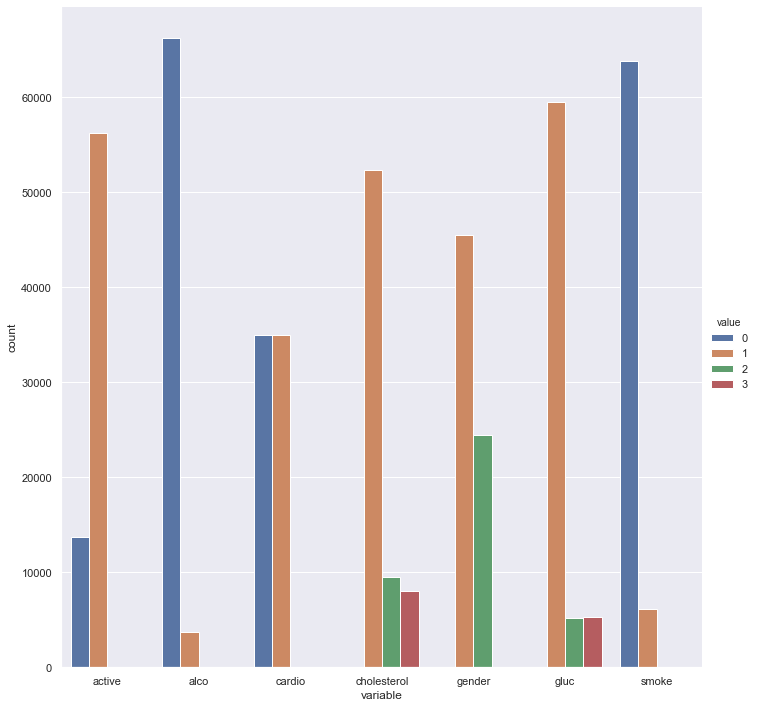

In [5]:
sns.catplot(x='variable', y='count', hue='value',  data=df2, kind='bar', height = 10)

Let's split the dataset by target values. 

In [6]:
df3 = pd.melt(frame = df, value_vars = ['active', 'alco', 'cholesterol', 'gender', 'gluc', 'smoke'], id_vars = 'cardio')
df3 = pd.DataFrame(df3.groupby(['variable', 'value', 'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
df3

,variable,value,cardio,count
0,active,0,0,6378
1,active,0,1,7361
2,active,1,0,28643
3,active,1,1,27618
4,alco,0,0,33080
5,alco,0,1,33156
6,alco,1,0,1941
7,alco,1,1,1823
8,cholesterol,1,0,29330
9,cholesterol,1,1,23055


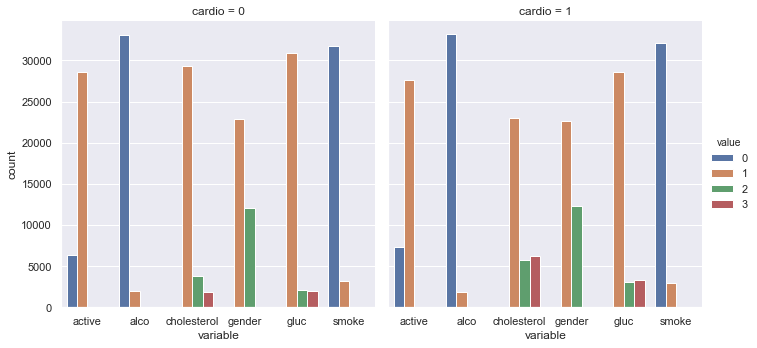

In [7]:
sns.catplot(x = 'variable', y = 'count', hue = 'value', col = 'cardio', data = df3, kind = 'bar')

### How many men and women are present in this dataset? Values of the gender feature were not given (whether "1" stands for women or for men) – figure this out by looking analyzing height, making the assumption that men are taller on average.

In [8]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [9]:
df[['gender', 'height']].groupby('gender').mean()

,height
gender,
1,161.355612
2,169.947895


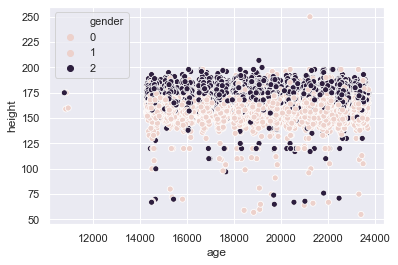

In [10]:
sns.scatterplot(df.age, df.height, hue = 'gender', data =df)

Assuming that men are generally taller than women 1 stands for women and 2 for men. Thus we have 45 530 female and 24 470 male

### Which gender more often reports consuming alcohol - men or women?

In [11]:
pd.crosstab(df.gender, df.alco)

alco,0,1
gender,,
1,44369,1161
2,21867,2603


In [12]:
df.groupby('gender')['alco'].mean()

gender
1    0.025500
2    0.106375
Name: alco, dtype: float64

Men tend to consume more alcohol

### What is the difference between the percentages of smokers among men and women?

In [13]:
df.groupby('gender')['smoke'].mean()

gender
1    0.017856
2    0.218880
Name: smoke, dtype: float64

In [14]:
round(abs(df[df['gender'] == 1]['smoke'].mean() - df[df['gender'] == 2]['smoke'].mean())*100)

20

### What is the difference between median values of age for smokers and non-smokers (in months, rounded)?

In [15]:
df.groupby('smoke')['age'].median() / 365.25

smoke
0    53.995893
1    52.361396
Name: age, dtype: float64

In [16]:
round(abs((df[df['smoke'] == 0]['age'].median() / 365.25) - (df[df['smoke'] == 1]['age'].median() / 365.25)) * 12)

20